# Support Vector Machine (SVM)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are:
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The kernels of SVM are:
- Linear
- Polynomial
- Radial basis function (RBF)
- Sigmoid

In [475]:
# Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
# ML lirbaries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [476]:
# Dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [477]:
X = df.drop('species', axis=1)
y = df['species']

In [478]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [479]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [480]:
# checking accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('classification report:', classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Confusion Matrix: [[14  0  0]
 [ 0  7  0]
 [ 0  1  8]]
classification report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



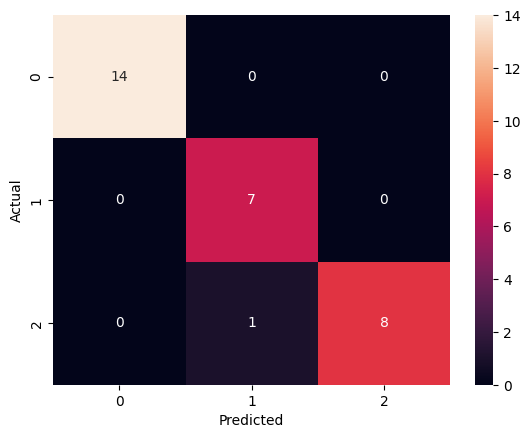

In [481]:
# heatmap of confusion matrix with xlabel and ylabel
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Regressor (SVR)

Support vector regressor (SVR) is a type of SVM that supports linear and non-linear regression. The main idea of SVR is to minimize error, individualizing the hyperplane which maximizes the margin, keeping in mind that part of the error is tolerated. The advantages of SVR are:
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

In [482]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [483]:
kashti = sns.load_dataset('titanic')
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [484]:
kashti.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [485]:
kashti.drop('deck', axis=1, inplace=True)
kashti['age'].fillna(kashti['age'].mean(), inplace=True)
kashti['embarked'].fillna(kashti['embarked'].mode()[0], inplace=True)
kashti['embark_town'].fillna(kashti['embark_town'].mode()[0], inplace=True)
kashti.dropna(inplace=True)

C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_5644\1548164243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kashti['age'].fillna(kashti['age'].mean(), inplace=True)
C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_5644\1548164243.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [486]:
kashti.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [487]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [488]:
# encoding the category and object columns (for loop method)
from sklearn.preprocessing import LabelEncoder
for col in kashti.columns:
    if kashti[col].dtype == 'object' or kashti[col].dtype.name == 'category':
        kashti[col] = LabelEncoder().fit_transform(kashti[col])

In [489]:
# Convert boolean columns to integers
kashti['adult_male'] = kashti['adult_male'].astype(int)
kashti['alone'] = kashti['alone'].astype(int)

In [490]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


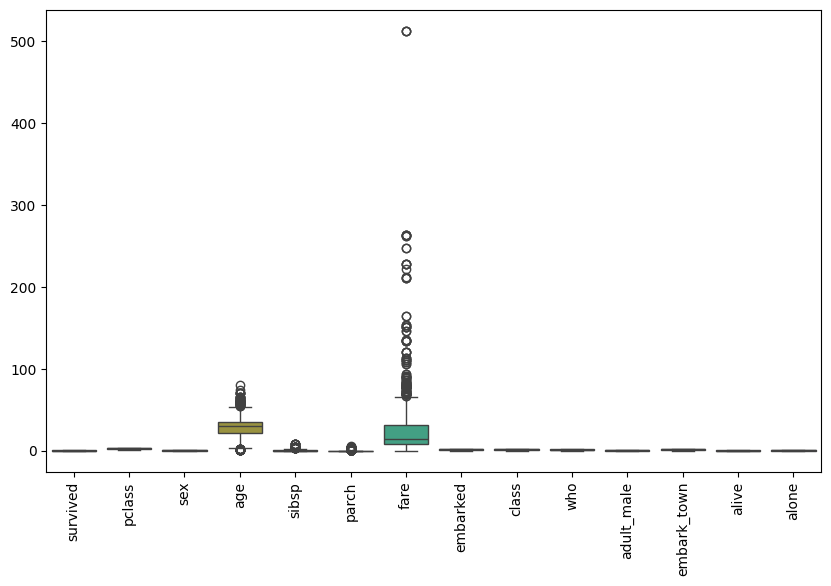

In [491]:
# identity the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=kashti)
plt.xticks(rotation=90)
plt.show()

In [492]:
# remove the outliers from age and fare column using IQR method
Q1 = kashti['age'].quantile(0.25)
Q3 = kashti['age'].quantile(0.75)
IQR = Q3 - Q1
kashti = kashti[(kashti['age'] >= (Q1 - 1.5 * IQR)) & (kashti['age'] <= (Q3 + 1.5 * IQR))]
Q1 = kashti['fare'].quantile(0.25)
Q3 = kashti['fare'].quantile(0.75)
IQR = Q3 - Q1
kashti = kashti[(kashti['fare'] >= (Q1 - 1.5 * IQR)) & (kashti['fare'] <= (Q3 + 1.5 * IQR))]

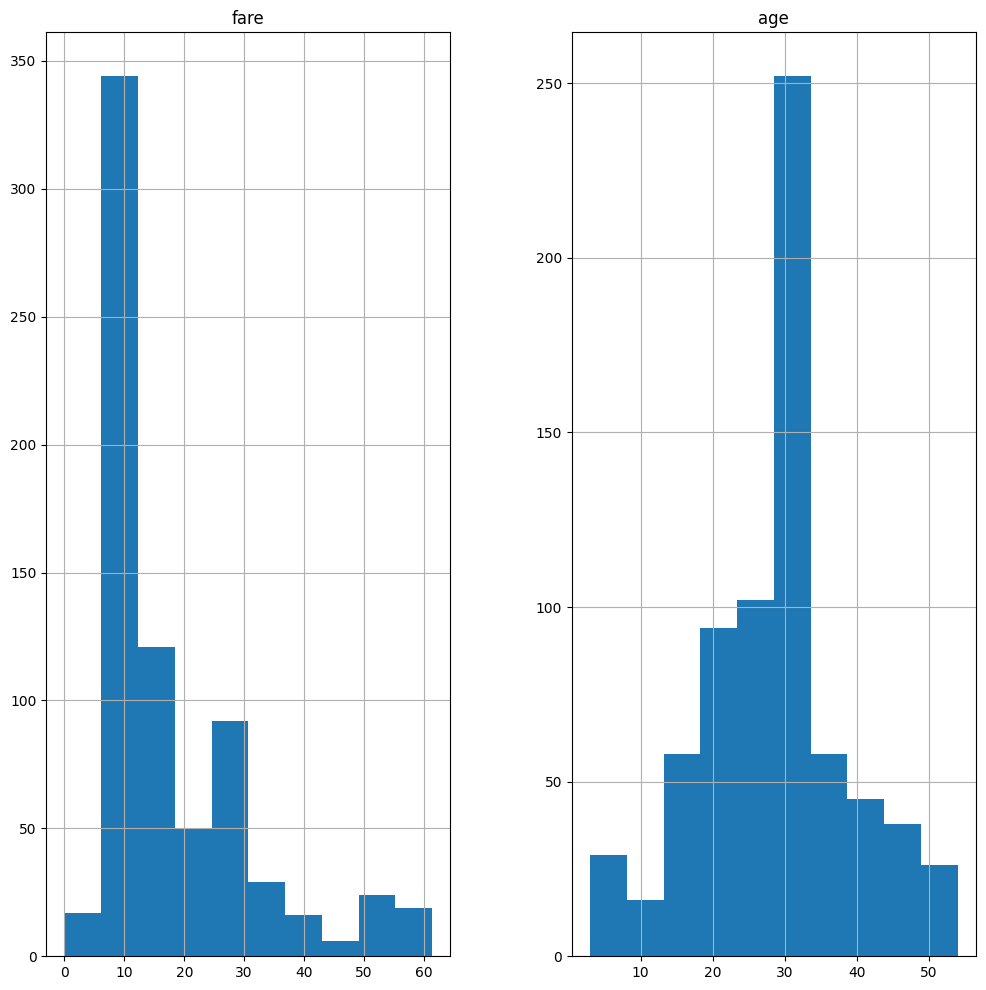

In [493]:
# check the normalization of the data using the histogram
kashti[['fare', 'age']].hist(figsize=(12, 12))
plt.show()

In [494]:
# Scaling the age and fare columns using using mixmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
kashti['age'] = scaler.fit_transform(kashti[['age']])
kashti['fare'] = scaler.fit_transform(kashti[['fare']])
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,0.372549,1,0,0.118118,2,2,1,1,2,0,0
2,1,3,0,0.450980,0,0,0.129115,2,2,2,0,2,1,1
3,1,1,0,0.627451,1,0,0.865114,2,0,2,0,2,1,0
4,0,3,1,0.627451,0,0,0.131152,2,2,1,1,2,0,1
5,0,3,1,0.523512,0,0,0.137804,1,2,1,1,1,0,1


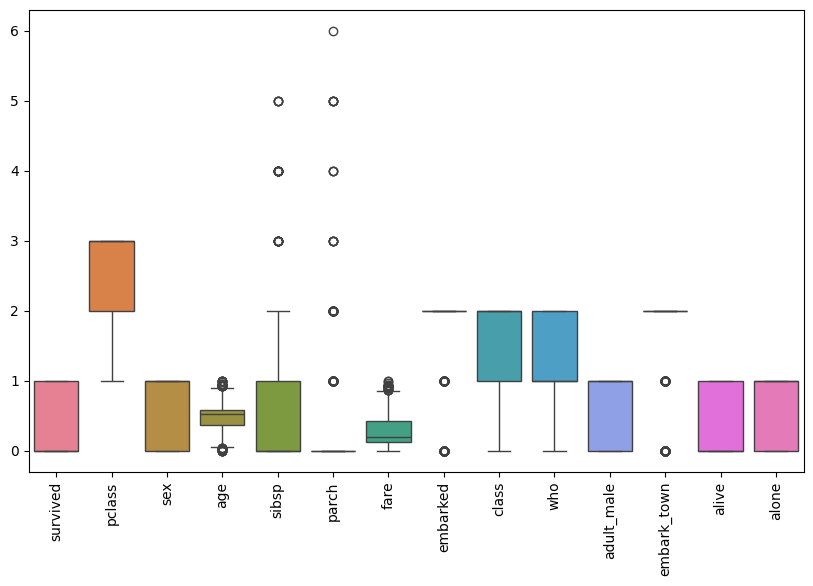

In [495]:
# identity the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=kashti)
plt.xticks(rotation=90)
plt.show()

In [496]:
X = kashti.drop('survived', axis=1)
y = kashti['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [497]:
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [498]:
# checking accuracy
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.007095633810044924
R2 Score: 0.9689784814073178
